In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
kb=1.38e-23
c=299792458

In [3]:
cane = pd.read_csv("/home/mohan/Downloads/Cane 1979 NGP - Sheet1.csv")

In [5]:
cane

,Freq (MHz),leading,exponent,Unnamed: 3,log(Brightness)
0,0.25,1.4,-22,0,-21.853872
1,0.29,2.9,-22,0,-21.537602
2,0.36,5.8,-22,0,-21.236572
3,0.43,9.0,-22,0,-21.045757
4,0.45,9.9,-22,0,-21.004365
...,...,...,...,...,...
80,81.50,2.3,-21,0,-20.638272
81,110.00,2.6,-21,0,-20.585027
82,175.00,2.5,-21,0,-20.602060
83,178.00,1.6,-21,0,-20.795880


In [6]:
cane['I'] = cane['leading'] * 10.**(cane['exponent'])
# cane['Freq (MHz)'].astype(int)

In [12]:
cane['lambda'] = c/cane['Freq (MHz)']/1e6

In [15]:
cane['Ta'] = 0.5 * cane['I'] * cane['lambda']**2 / kb

In [16]:
with np.load("./brightness.npz") as f:
    lfsm_freqs = f['freqs']
    lfsm_Ta = f['brightness']

Text(0, 0.5, 'log(Ta)')

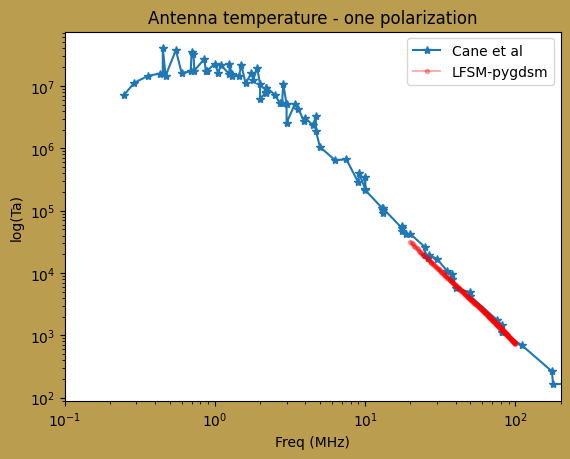

In [75]:
fig,ax=plt.subplots(1,1)
fig.set_facecolor('#ba9d4e')
ax.loglog(cane['Freq (MHz)'], cane['Ta'],'-*',label='Cane et al')
ax.loglog(lfsm_freqs, 0.5*lfsm_Ta,marker='.',c='red',label='LFSM-pygdsm',alpha=0.3) #0.5 bc one pol only
ax.set_xlim(0.1,200)
ax.set_xlim()
plt.legend()
plt.title("Antenna temperature - one polarization")
plt.xlabel("Freq (MHz)")
plt.ylabel("log(Ta)")
# ax.set_ylim(5,8)

(0.1, 200)

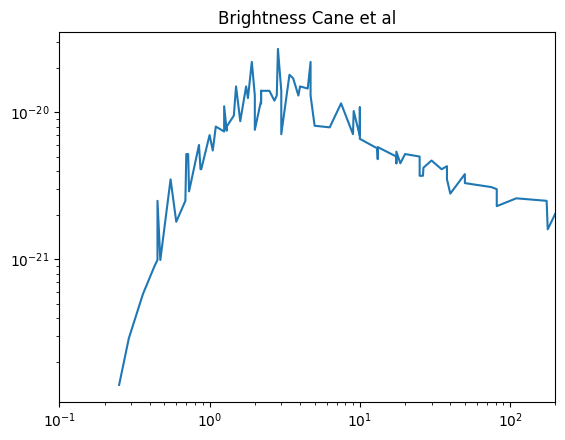

In [79]:
plt.title('Brightness Cane et al')
plt.loglog(cane['Freq (MHz)'], cane['I'])
plt.xlim(0.1,200)

/tmp/ipykernel_8843/1431740569.py:3: RuntimeWarning: overflow encountered in exp
  y2= -10*x*1/(1+np.exp(-100*(x-5)))


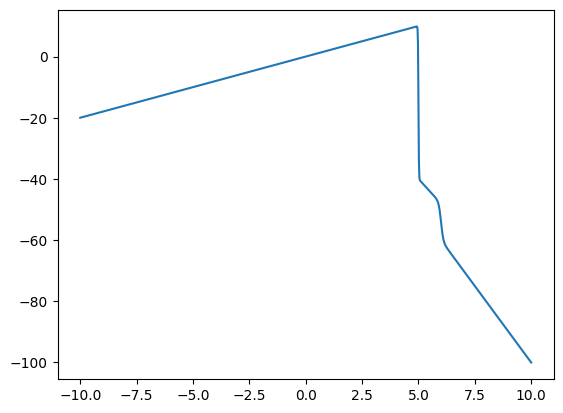

In [118]:
x=np.linspace(-10,10,1001)
y1=2*x * 1/(1+np.exp(20*(x-6)))
y2= -10*x*1/(1+np.exp(-100*(x-5)))
y = y1+y2
# y = 1/(1+np.exp(x+5))
plt.plot(x,y1+y2)
# plt.plot(x,y1)
# plt.plot(x,y2)

In [119]:
def myfunc(x,*params):
    I0 = params[0]
    alpha = params[1]
    c = params[2]
    beta = params[3]
    I1 = params[4]
    gamma = params[5]
    g = I0 * x **(-alpha) * (1 - np.exp(-c * x **(-beta)))/(c * x ** (-beta))
    eg = I1 * x ** (-gamma) * np.exp(-c * x **(-beta))
    return g+eg

In [173]:
def myfunc2(x,*params):
    I0 = params[0]
    alpha0 = params[1]
    c0 = params[2]
    I1 = params[3]
    alpha1 = params[4]
    c1 = params[5]
    res = -I0 * x / (1 + np.exp(-alpha0 * (x - c0)))  + I1 * x / (1 + np.exp(alpha1 * (x - c1)))
    return res

In [176]:
x = cane.loc[(cane['Freq (MHz)']<100)&(cane['Freq (MHz)']>3),'Freq (MHz)'].values
x = np.hstack([x, lfsm_freqs])

y = cane.loc[(cane['Freq (MHz)']<100)&(cane['Freq (MHz)']>3),'Ta'].values
y = np.hstack([y, 0.5*lfsm_Ta])
x=np.log10(x)
y=np.log10(y)

vals = np.zeros((len(x),2))
vals[:,0] = x
vals[:,1] = y
vals=vals[vals[:, 0].argsort()]
x= vals[:,0]
y= vals[:,1]

In [178]:
m,c=np.polyfit(x,y,1)

In [179]:
print(m,c)

-2.503763799033661 7.852168086387015


In [136]:
from scipy.optimize import curve_fit

In [170]:
# curve_fit(myfunc, x, y, [1e6,2.5,5,2.1,1e6,2.8],bounds=(0,np.inf))

params,pcov=curve_fit(myfunc2, x, y, [6,2,0.2,6,1,0.2],bounds=(0,10))

In [171]:
params

array([1.00000000e+01, 1.00000000e+01, 4.20675210e-22, 7.88037694e+00,
       2.82946170e+00, 9.69145216e+00])

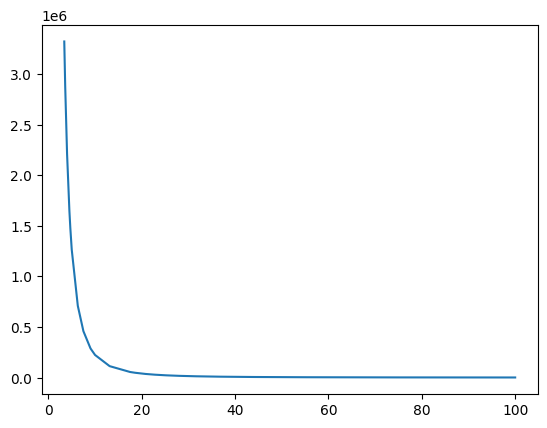

In [183]:
# ypred= myfunc2(x,*params)
ypred=m*x+c
# plt.plot(x,y)
plt.plot(10**x,10**ypred)